# Import Libraries

In [33]:
# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To do inferential analysis
from scipy.stats import pearsonr
from scipy.stats import ttest_ind, f_oneway

# Test train split for training the model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#Importing confusion_matrix, accuracy_score, classification_report from sklearn.metrics library to obtain confusion matrix, accuracy score and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline



In [34]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('train.csv')
print("Original Data:")
# print the first 5 rows of the dataframe
df.head()

Original Data:


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [35]:
# Drop unnecessary columns
# Assuming unnecessary columns based on common practice, adjust as needed
columns_to_drop = ['id','CustomerId', 'Surname']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [36]:
print(f"The missing values given columns are:")
df.isnull().sum()

The missing values given columns are:


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [37]:
# Display the cleaned data
print("Cleaned Data:")
df.head()

Cleaned Data:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# Exploratory Data Analysis

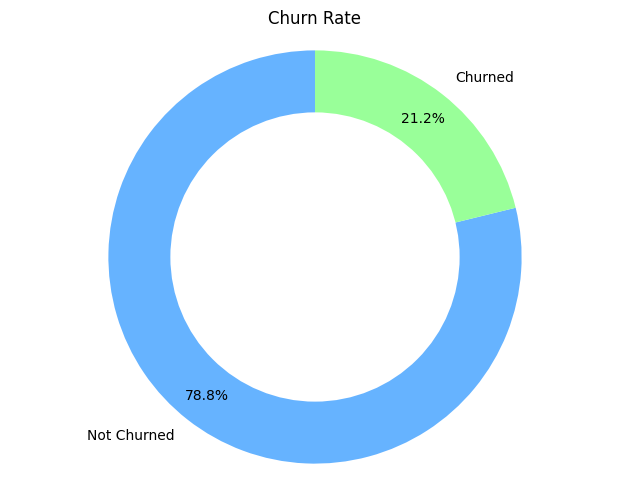

In [38]:
import matplotlib.pyplot as plt

# Calculate churn rate
churn_counts = df['Exited'].value_counts()
churn_rate = churn_counts / churn_counts.sum() * 100

# Plotting a donut chart
labels = ['Not Churned', 'Churned']
sizes = churn_rate.values
colors = ['#66b3ff','#99ff99']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.title('Churn Rate')
plt.show()

In [39]:
# types of columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

categorical_cols = df.select_dtypes(include=['object']).columns

In [40]:
# Example: T-test for numerical variables
for col in numerical_cols:
    group1 = df[df['Exited'] == 0][col]
    group2 = df[df['Exited'] == 1][col]
    t_stat, p_value = ttest_ind(group1, group2)
    print(f"T-test for {col} between Exited and Non-Exited Customers:\nT-statistic: {t_stat}\nP-value: {p_value}\n")

# Example: ANOVA for categorical variables with more than two groups
# Assuming 'Geography' is categorical with more than two levels
for col in ['Geography']:  # Adjust as per actual categorical variables
    groups = [df[df[col] == group][df['Exited'] == 1]['Balance'] for group in df[col].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"ANOVA for {col} and Exited:\nF-statistic: {f_stat}\nP-value: {p_value}\n")

T-test for CreditScore between Exited and Non-Exited Customers:
T-statistic: 11.188488172986235
P-value: 4.756179732604674e-29

T-test for Age between Exited and Non-Exited Customers:
T-statistic: -147.31001166485675
P-value: 0.0

T-test for Tenure between Exited and Non-Exited Customers:
T-statistic: 7.943254399574219
P-value: 1.9817395336288168e-15

T-test for Balance between Exited and Non-Exited Customers:
T-statistic: -53.10568417927209
P-value: 0.0

T-test for NumOfProducts between Exited and Non-Exited Customers:
T-statistic: 89.2247303453765
P-value: 0.0

T-test for HasCrCard between Exited and Non-Exited Customers:
T-statistic: 8.993266727359892
P-value: 2.4243896478026863e-19

T-test for IsActiveMember between Exited and Non-Exited Customers:
T-statistic: 87.33417147602367
P-value: 0.0

T-test for EstimatedSalary between Exited and Non-Exited Customers:
T-statistic: -7.604113544716312
P-value: 2.8837082758161066e-14

T-test for Exited between Exited and Non-Exited Customers:


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3295000304.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups = [df[df[col] == group][df['Exited'] == 1]['Balance'] for group in df[col].unique()]
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3295000304.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups = [df[df[col] == group][df['Exited'] == 1]['Balance'] for group in df[col].unique()]
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3295000304.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups = [df[df[col] == group][df['Exited'] == 1]['Balance'] for g

In [41]:
# Example: Pearson correlation coefficient for numerical variables
for col in numerical_cols:
    corr, p_value = pearsonr(df[col], df['Exited'])
    print(f"Pearson correlation coefficient between {col} and Exited: {corr}\nP-value: {p_value}\n")

Pearson correlation coefficient between CreditScore and Exited: -0.027541301167701926
P-value: 4.756179732600798e-29

Pearson correlation coefficient between Age and Exited: 0.3410088831743812
P-value: 0.0

Pearson correlation coefficient between Tenure and Exited: -0.01955659431561352
P-value: 1.9817395336285214e-15

Pearson correlation coefficient between Balance and Exited: 0.1296691466783684
P-value: 0.0

Pearson correlation coefficient between NumOfProducts and Exited: -0.21459784781929603
P-value: 0.0

Pearson correlation coefficient between HasCrCard and Exited: -0.02214057127023982
P-value: 2.424389647802743e-19

Pearson correlation coefficient between IsActiveMember and Exited: -0.21025387942620616
P-value: 0.0

Pearson correlation coefficient between EstimatedSalary and Exited: 0.01872191582980993
P-value: 2.883708275817522e-14

Pearson correlation coefficient between Exited and Exited: 0.9999999999999997
P-value: 0.0



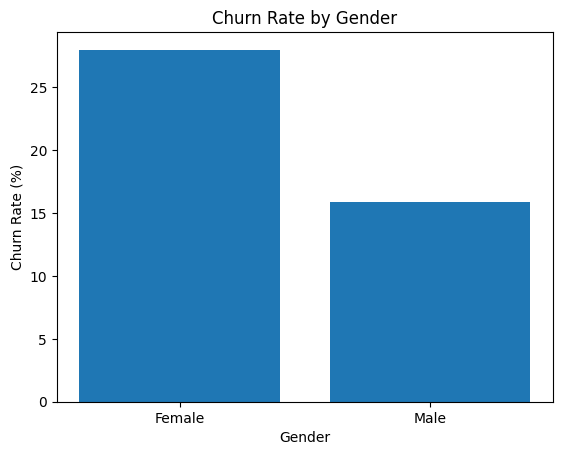

In [42]:
# Group the data by gender and calculate churn rate for each group
gender_churn = df.groupby('Gender')['Exited'].mean()

# Create a bar chart
plt.bar(gender_churn.index, gender_churn.values * 100)
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Gender')
plt.show()

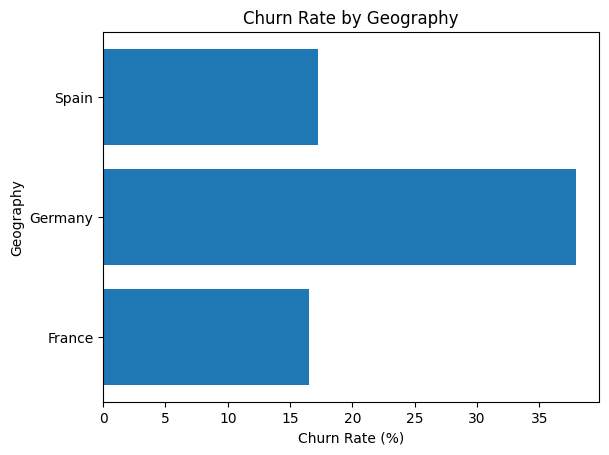

In [43]:
# Group the data by geography and calculate churn rate for each group
geography_churn = df.groupby('Geography')['Exited'].mean()

# Create a horizontal bar chart
plt.barh(geography_churn.index, geography_churn.values * 100)
plt.xlabel('Churn Rate (%)')
plt.ylabel('Geography')
plt.title('Churn Rate by Geography')
plt.show()

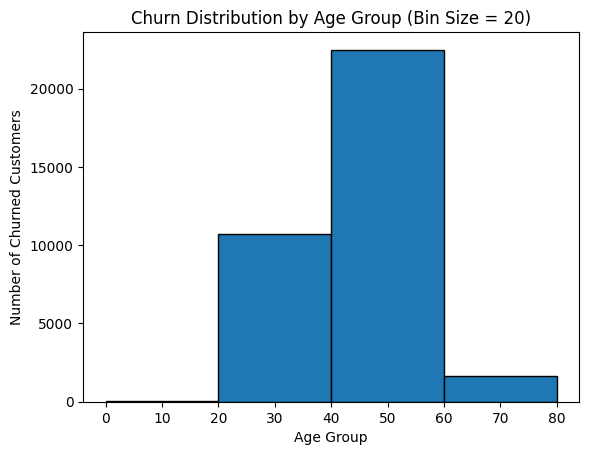

In [44]:
# Create a histogram to show churn % for people of different Age group with a bin size =20
plt.hist(df[df['Exited'] == 1]['Age'], bins=range(0, 100, 20), edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Number of Churned Customers')
plt.title('Churn Distribution by Age Group (Bin Size = 20)')
plt.show()

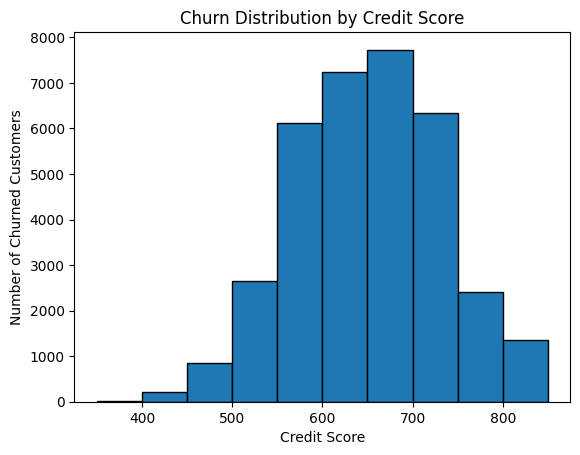

In [45]:
# Create a histogram to show churn % for customers of different CreditScore
plt.hist(df[df['Exited'] == 1]['CreditScore'], bins=10, edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Number of Churned Customers')
plt.title('Churn Distribution by Credit Score')
plt.show()

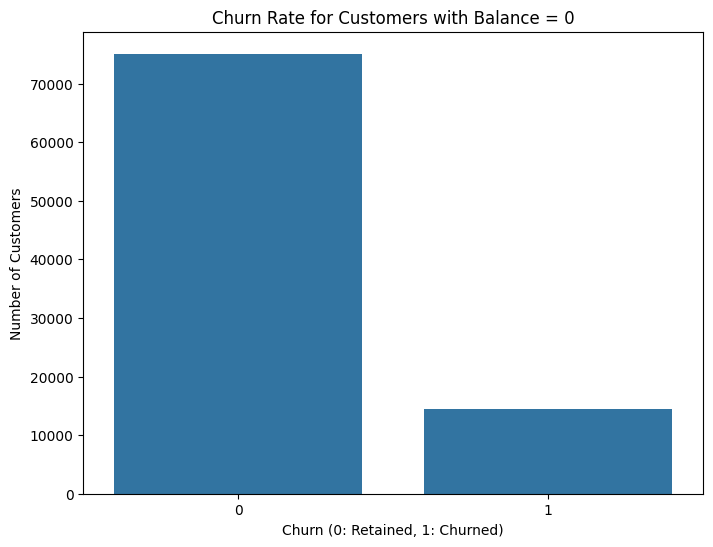

In [46]:
# Filter the DataFrame for customers with Balance = 0
zero_balance_df = df[df['Balance'] == 0]

# Create a count plot to show churn rate for customers with Balance = 0
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=zero_balance_df)
plt.xlabel('Churn (0: Retained, 1: Churned)')
plt.ylabel('Number of Customers')
plt.title('Churn Rate for Customers with Balance = 0')
plt.show()

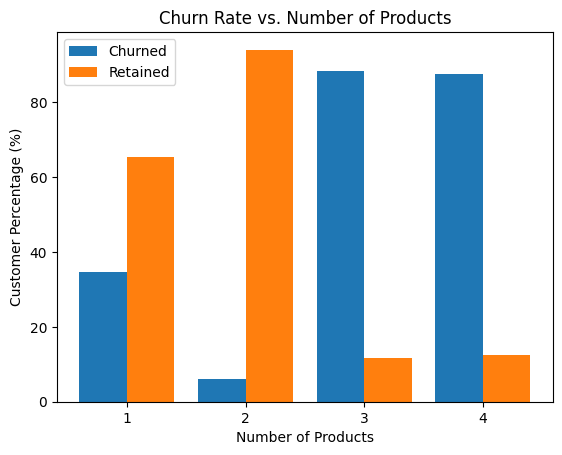

In [47]:
# Group the data by number of products and calculate churn rate for each group
product_churn = df.groupby('NumOfProducts')['Exited'].mean()

# Create a bar chart
plt.bar(product_churn.index - 0.2, product_churn.values * 100, width=0.4, label='Churned')
plt.bar(product_churn.index + 0.2, (1 - product_churn.values) * 100, width=0.4, label='Retained')
plt.xlabel('Number of Products')
plt.ylabel('Customer Percentage (%)')
plt.title('Churn Rate vs. Number of Products')
plt.xticks(product_churn.index)
plt.legend()
plt.show()

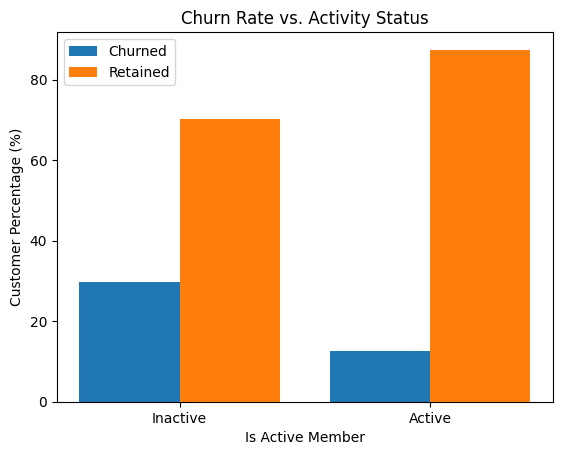

In [48]:
# Group the data by activity status and calculate churn rate for each group
active_churn = df.groupby('IsActiveMember')['Exited'].mean()

# Create a bar chart
plt.bar(active_churn.index - 0.2, active_churn.values * 100, width=0.4, label='Churned')
plt.bar(active_churn.index + 0.2, (1 - active_churn.values) * 100, width=0.4, label='Retained')
plt.xlabel('Is Active Member')
plt.ylabel('Customer Percentage (%)')
plt.title('Churn Rate vs. Activity Status')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.legend()
plt.show()

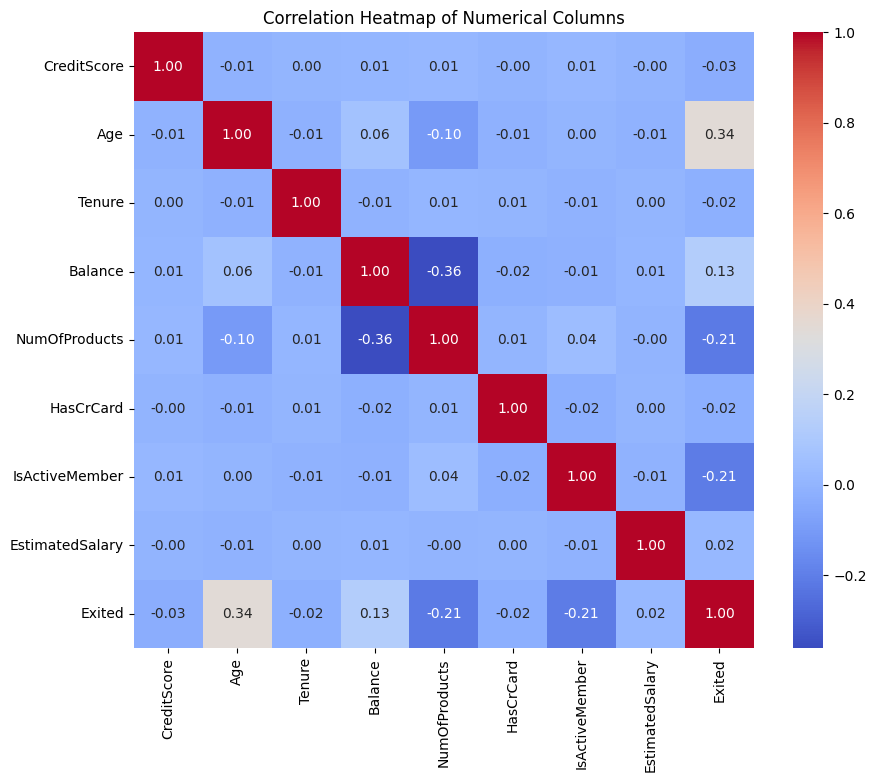

In [49]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Machine Learning

In [50]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [51]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

# Convert any remaining True/False to 1/0 (if they exist)
df = df.astype(int)

# Display the modified DataFrame
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33,3,0,2,1,0,181449,0,1,0,0,0,1
1,627,33,1,0,2,1,1,49503,0,1,0,0,0,1
2,678,40,10,0,2,1,0,184866,0,1,0,0,0,1
3,581,34,2,148882,1,1,1,84560,0,1,0,0,0,1
4,716,33,5,0,2,1,1,15068,0,0,0,1,0,1


In [52]:
# split the data into X and y
X = df.drop('Exited', axis=1)
y = df['Exited']

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=36)

In [54]:
scaler=StandardScaler()#To make mean =0 and sd =1 using z score formula
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [55]:
# Specifiy the model
model= LogisticRegression() #Choose c as large
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test)
#model.score(X_test,y_test)

#To check accuracy
print("Accuracy of the Logistic Regression Model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy of the Logistic Regression Model in % is: 83.4
********************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     42942
           1       0.69      0.38      0.49     11479

    accuracy                           0.83     54421
   macro avg       0.77      0.67      0.70     54421
weighted avg       0.82      0.83      0.81     54421



In [56]:
# Specifiy the model
model= GaussianNB()


# Fit the model to the data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#To check accuracy
print("Accuracy of the Naive Bayes Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy of the Naive Bayes Classifier model in % is: 79.98
********************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     42942
           1       0.53      0.48      0.50     11479

    accuracy                           0.80     54421
   macro avg       0.70      0.68      0.69     54421
weighted avg       0.79      0.80      0.80     54421



In [57]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test)

#To check accuracy
print("Accuracy of the Decision Tree Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy of the Decision Tree Classifier model in % is: 79.66
********************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     42942
           1       0.52      0.54      0.53     11479

    accuracy                           0.80     54421
   macro avg       0.70      0.70      0.70     54421
weighted avg       0.80      0.80      0.80     54421



In [58]:
model = RandomForestClassifier()
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test)
#model.score(X_test,y_test)

#To check accuracy
print("Accuracy of the Random Forest Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy of the Random Forest Classifier model in % is: 85.92
********************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     42942
           1       0.73      0.54      0.62     11479

    accuracy                           0.86     54421
   macro avg       0.80      0.74      0.76     54421
weighted avg       0.85      0.86      0.85     54421



In [59]:
model = AdaBoostClassifier()
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test)
#model.score(X_test,y_test)

#To check accuracy
print("Accuracy of the AdaBoost Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of the AdaBoost Classifier model in % is: 86.24
********************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     42942
           1       0.75      0.53      0.62     11479

    accuracy                           0.86     54421
   macro avg       0.81      0.74      0.77     54421
weighted avg       0.85      0.86      0.85     54421



In [60]:
model = XGBClassifier()
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test)
#model.score(X_test,y_test)

#To check accuracy
print("Accuracy of the XGBoost Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy of the XGBoost Classifier model in % is: 86.54
********************************************************************************
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     42942
           1       0.74      0.56      0.64     11479

    accuracy                           0.87     54421
   macro avg       0.81      0.75      0.78     54421
weighted avg       0.86      0.87      0.86     54421



In [61]:
best_model = model

In [64]:
# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('bank_churn.pkl', 'wb'))

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
